In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
import plotly.io as pio

In [16]:
### Import data into a pandas dataframe, note that the separator is a ';' instead of the typical ','
df = pd.read_csv("~/Downloads/merged_gw.csv", sep=",")

In [17]:
df.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1


In [25]:
print(df.columns)

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [36]:
print(df[df['name'] == "Mohamed Salah"])

               name position       team    xP  assists  bonus  bps  \
140   Mohamed Salah      MID  Liverpool   5.0        1      3   38   
757   Mohamed Salah      MID  Liverpool  12.5        0      2   34   
1387  Mohamed Salah      MID  Liverpool  14.2        2      3   60   
2035  Mohamed Salah      MID  Liverpool  11.3        0      0    9   
2694  Mohamed Salah      MID  Liverpool   9.3        1      0   31   
3356  Mohamed Salah      MID  Liverpool   9.3        0      3   32   
4020  Mohamed Salah      MID  Liverpool   5.7        0      0    5   
4686  Mohamed Salah      MID  Liverpool   8.8        1      2   42   
5354  Mohamed Salah      MID  Liverpool   8.8        0      3   33   
6025  Mohamed Salah      MID  Liverpool  11.3        0      2   31   
6699  Mohamed Salah      MID  Liverpool  12.0        1      3   39   

      clean_sheets  creativity  element  ...  team_h_score  threat  \
140              1        24.4      328  ...             0    70.0   
757              1 

In [69]:
def playerComp(df, player_names):    
    plt.figure(figsize=(10, 6))

    # Loop over the list of player names
    for name in player_names:
        # Filter data for each player
        player_data = df[df['name'] == name]
        
        # Calculate the incremental cumulative sum (running total) for total points
        player_data['running_total_points'] = player_data['total_points'].cumsum()
        
        # Calculate the ratio of running total points to value
        player_data['points_to_value_ratio'] = player_data['running_total_points'] / player_data['value']
        
        # Plot the ratio of running total points to value against GW (Gameweek)
        plt.plot(player_data['GW'], player_data['points_to_value_ratio'], label=f'{name} (Points/Value Ratio)', marker='o')

    # Labels and title
    plt.xlabel('Gameweek (GW)')  # X-axis label (Gameweek)
    plt.ylabel('Points to Value Ratio')  # Y-axis label (ratio of running total points to value)
    plt.title('Points to Value Ratio Over Time for Selected Players')
    
    # Add legend to indicate player names
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()



/var/folders/jq/0g_hl36s67j3cvfx69_5pygm0000gn/T/ipykernel_11426/2707430216.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['running_total_points'] = player_data['total_points'].cumsum()
/var/folders/jq/0g_hl36s67j3cvfx69_5pygm0000gn/T/ipykernel_11426/2707430216.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['points_to_value_ratio'] = player_data['running_total_points'] / player_data['value']
/var/folders/jq/0g_hl36s67j3cvfx69_5pygm0000gn/T/ipykernel_11426/2707430216.py:11

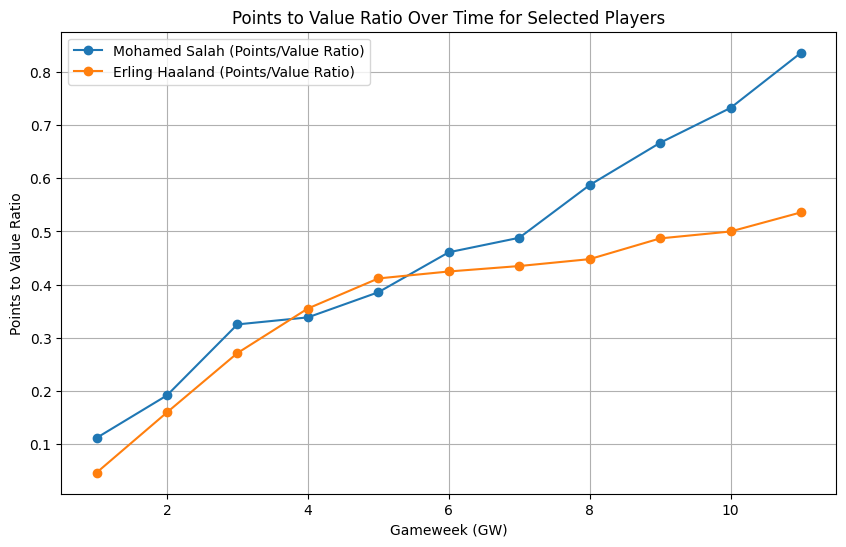

In [70]:
playerComp(df, ['Mohamed Salah','Erling Haaland'])

In [66]:
def plot_fpl_performance_funnel(df, players, player='name', total_points_column='total_points', xp_column='xP'):
    # Filter the dataframe for the players in the list
    df_filtered = df[df[player].isin(players)]

    # If the filtered dataframe is empty, inform the user
    if df_filtered.empty:
        print(f"Error: No players found matching the names in the list {players}")
        return

    # Calculate the residuals (actual points - expected points)
    df_filtered['Residual'] = df_filtered[total_points_column] - df_filtered[xp_column]

    # Calculate mean and standard deviation of the residuals for each player
    residual_stats = df_filtered.groupby(player)['Residual'].agg(['mean', 'std']).reset_index()

    # Rename columns to match the original dataframe's player column name
    residual_stats.rename(columns={'mean': 'mean_residual', 
                                   'std': 'std_residual'}, inplace=True)

    # Merge the residual statistics back with the original filtered dataframe
    df_filtered = pd.merge(df_filtered, residual_stats[[player, 'mean_residual', 'std_residual']], 
                           on=player, how='left')

    # Plot the funnel plot
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual points (total_points) vs expected points (xP)
    sns.scatterplot(data=df_filtered, 
                    x=xp_column, 
                    y=total_points_column, 
                    hue=player,      # Color by player name
                    style=player,    # Different marker for each player
                    palette='Set2',   # Choose a palette for colors
                    markers='o',      # Use circle markers (default)
                    size='Residual',  # Size by residual
                    sizes=(20, 200),  # Adjust size range
                    alpha=0.8)        # Set transparency for better visibility

    # Set distinct colors for players
    color_map = sns.color_palette("Set2", len(players))  # Generate a color palette for the players
    player_colors = {players[i]: color_map[i] for i in range(len(players))}  # Map player names to colors

    # Plot the funnel plot bounds for each player with different colors
    for player_name, group in df_filtered.groupby(player):
        player_mean = group['mean_residual'].iloc[0]
        
        # Use the player's color from the color_map
        player_color = player_colors.get(player_name, 'gray')  # Default to 'gray' if no color found

        # Plot bounds for each player with their specific color
        plt.axhline(player_mean, color=player_color, linestyle='--', label=f'{player_name} Mean Residual')

    # Labels and title
    plt.title("FPL Performance Funnel Plot: Actual vs Expected Points", fontsize=16)
    plt.xlabel(f"Expected Points ({xp_column})", fontsize=12)
    plt.ylabel(f"Total Points ({total_points_column})", fontsize=12)
    plt.legend(title="Player Performance", loc="upper left", bbox_to_anchor=(1.05, 1))

    # Display the plot
    plt.tight_layout()
    plt.show()


/var/folders/jq/0g_hl36s67j3cvfx69_5pygm0000gn/T/ipykernel_11426/2884318967.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Residual'] = df_filtered[total_points_column] - df_filtered[xp_column]
/var/folders/jq/0g_hl36s67j3cvfx69_5pygm0000gn/T/ipykernel_11426/2884318967.py:33: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_filtered,


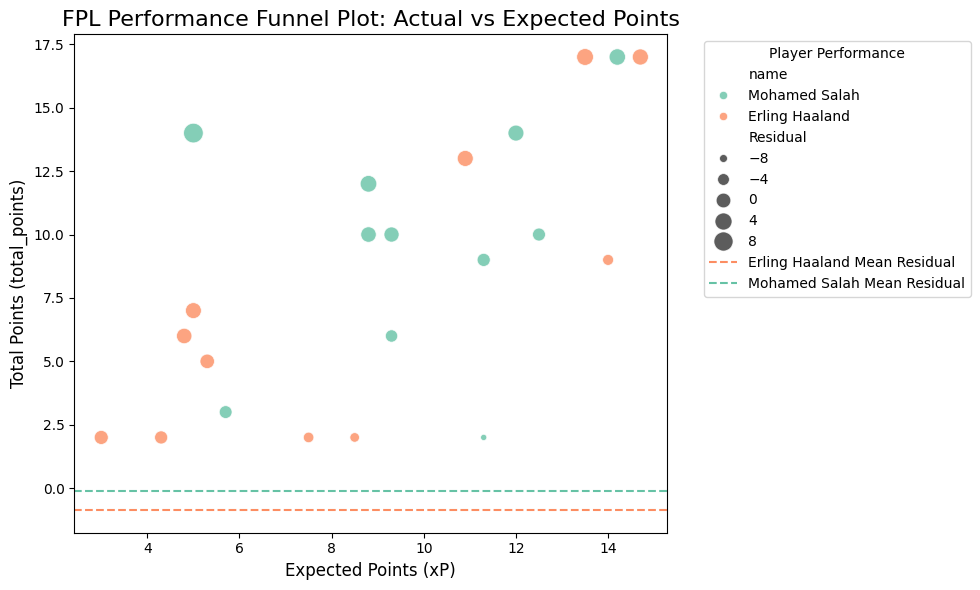

In [67]:
plot_fpl_performance_funnel(df, ['Mohamed Salah', 'Erling Haaland'])